In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [2]:
df=pd.read_csv('bank_marketing_part1_Data-1.csv') 

In [3]:
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df1=df.describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      14.85  2.91  10.59  12.27   14.36  17.30  21.18   
advance_payments              14.56  1.31  12.41  13.45   14.32  15.72  17.25   
probability_of_full_payment    0.87  0.02   0.81   0.86    0.87   0.89   0.92   
current_balance                5.63  0.44   4.90   5.26    5.52   5.98   6.68   
credit_limit                   3.26  0.38   2.63   2.94    3.24   3.56   4.03   
min_payment_amt                3.70  1.50   0.77   2.56    3.60   4.77   8.46   
max_spent_in_single_shopping   5.41  0.49   4.52   5.04    5.22   5.88   6.55   

                              range   IQR    CV  mode1  mode2  mode3  
spending                      10.59  5.04  0.20  11.23  14.11  15.38  
advance_payments               4.84  2.27  0.09  13.47    NaN    NaN  
probability_of_full_payment    0.11  0.03  0.03   0.88    NaN    NaN  
current_balance                1.78  0.72  0.08   5.24   5.40    NaN  
credit_limit                   1.40  0.62  0.12   3.03    NaN    NaN  
min_payment_amt                7.69  2.21  0.41   2.13   2.22   2.70  
max_spent_in_single_shopping   2.03  0.83  0.09   5.00    NaN    NaN

In [6]:
df.isnull().sum().sum()

0

In [7]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [8]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("--------------------------------")
    print(df[column].describe(),end=' ')
    
    
    print("\n\nDistribution of " + column)
    print("-------------------------------------")
    sns.displot(df[column], kde=1, color='g',bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("------------------------------")
    ax = sns.boxplot(x=df[column]);
    plt.show()


Description of spending
--------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 

Distribution of spending
-------------------------------------


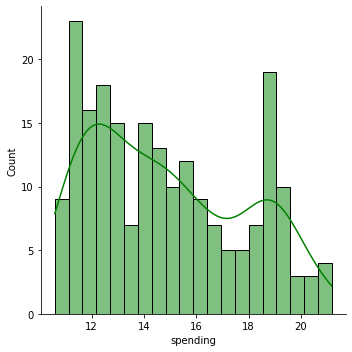

BoxPlot of spending
------------------------------


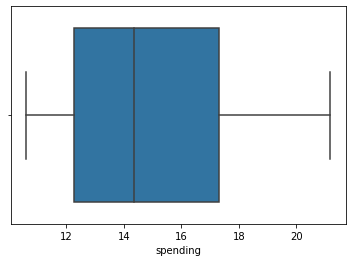

Description of advance_payments
--------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 

Distribution of advance_payments
-------------------------------------


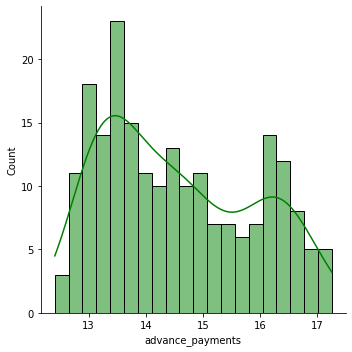

BoxPlot of advance_payments
------------------------------


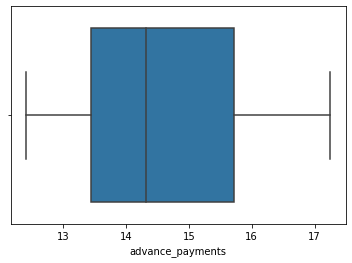

Description of probability_of_full_payment
--------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 

Distribution of probability_of_full_payment
-------------------------------------


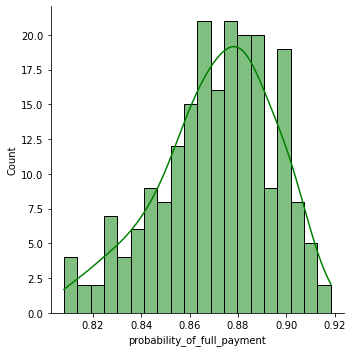

BoxPlot of probability_of_full_payment
------------------------------


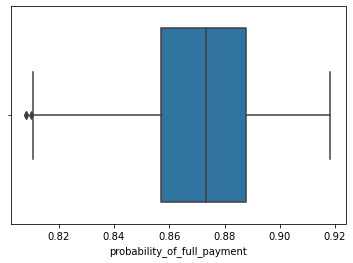

Description of current_balance
--------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 

Distribution of current_balance
-------------------------------------


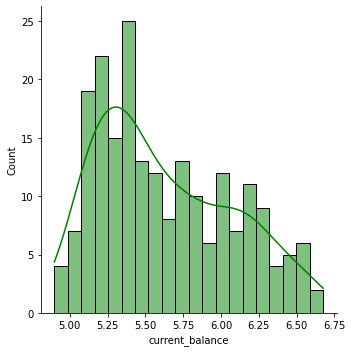

BoxPlot of current_balance
------------------------------


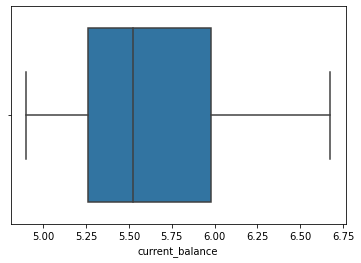

Description of credit_limit
--------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 

Distribution of credit_limit
-------------------------------------


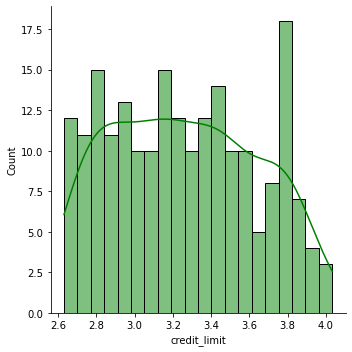

BoxPlot of credit_limit
------------------------------


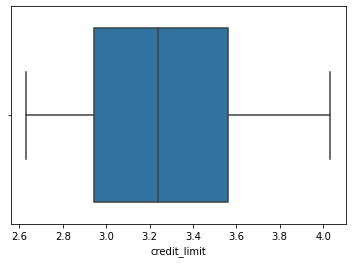

Description of min_payment_amt
--------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 

Distribution of min_payment_amt
-------------------------------------


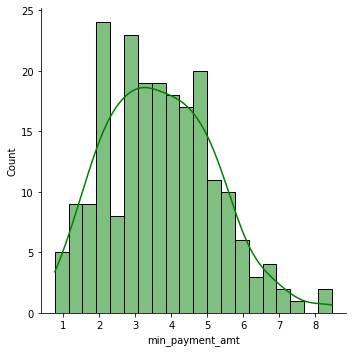

BoxPlot of min_payment_amt
------------------------------


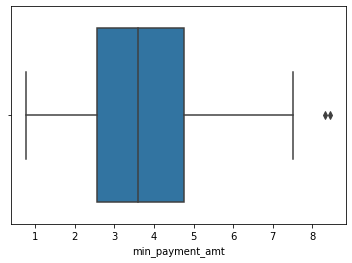

Description of max_spent_in_single_shopping
--------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 

Distribution of max_spent_in_single_shopping
-------------------------------------


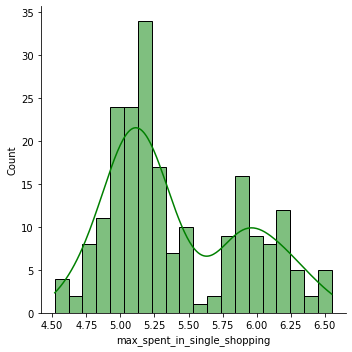

BoxPlot of max_spent_in_single_shopping
------------------------------


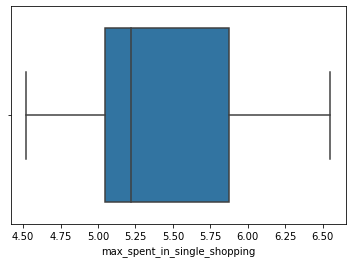

In [9]:
lstcolumns = list(df.columns.values)
for x in lstcolumns:
    univariateAnalysis_numeric(x,20)

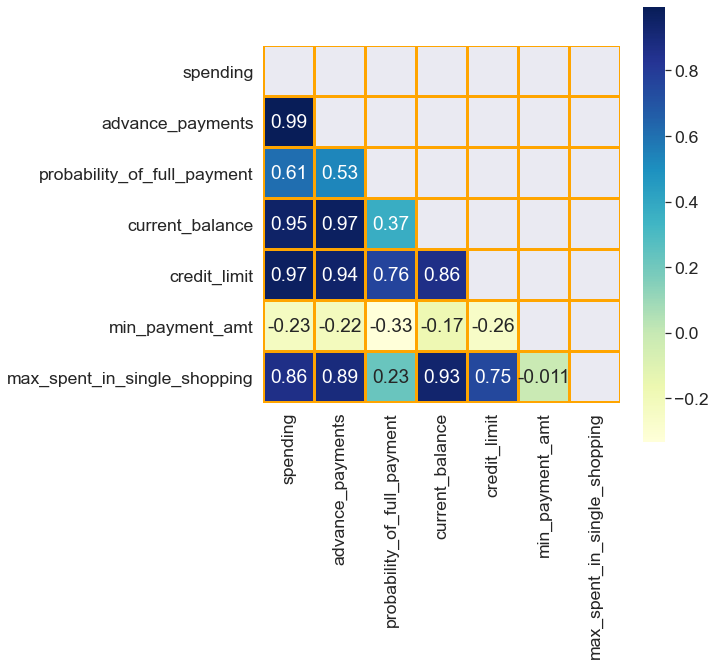

In [10]:
plt.figure(figsize=(8,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.set(font_scale=1.6)
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,linewidths=2,
                linecolor='orange',square=True,mask=mask);
sns.set(font_scale=1)

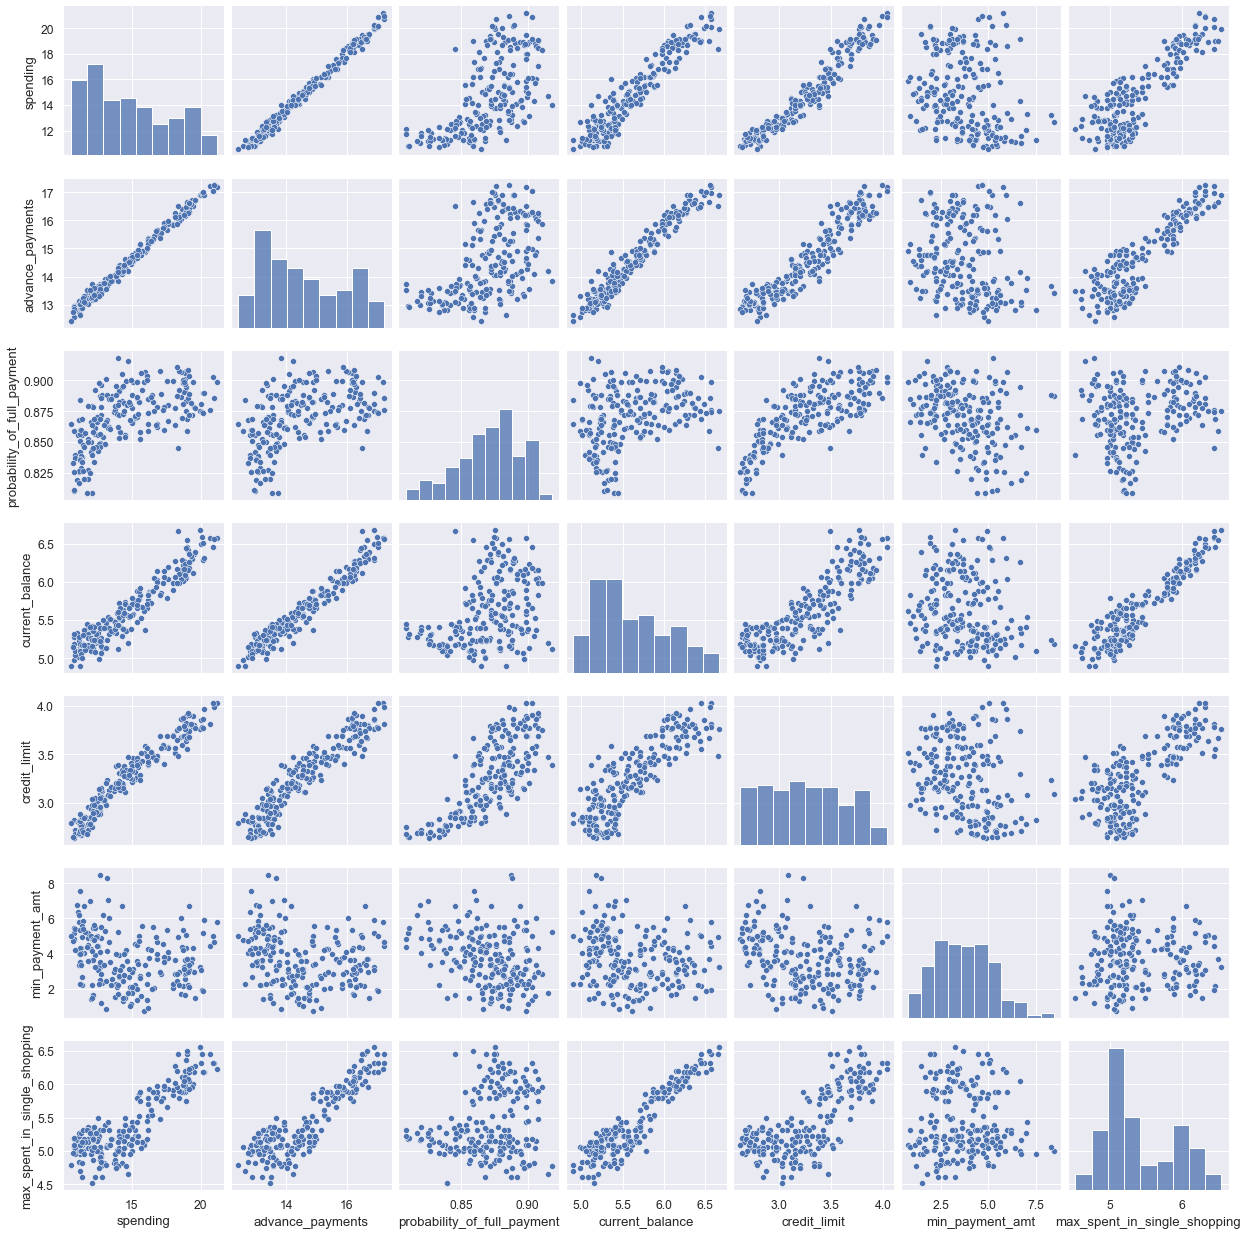

In [11]:
sns.set(font_scale=1.1)
sns.pairplot(df).savefig('out.jpg')
sns.set(font_scale=1)

In [12]:
#import scipy.stats as stats
%matplotlib inline

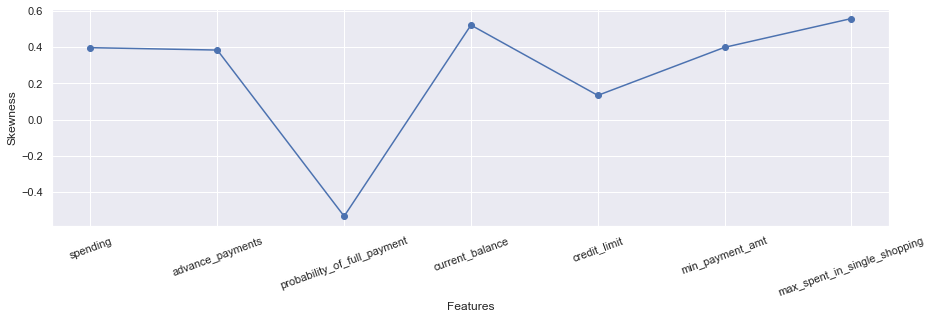

In [13]:
pd.DataFrame(stats.skew(df),index=df.columns).plot(kind='line',grid=1,figsize=(15,4),rot=20,legend=0,xlabel='Features',ylabel='Skewness',marker='o');

In [14]:
def treat_outlier(x):
    # taking 25,75 percentile of column
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [15]:
outlier_list = ['probability_of_full_payment' , 'min_payment_amt']

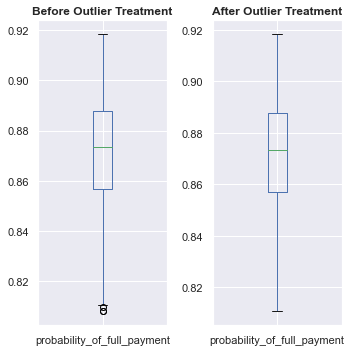

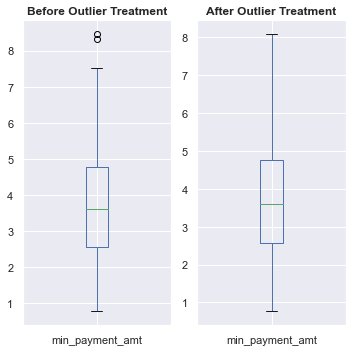

In [16]:
for i in outlier_list:
    
    plt.subplot(1,2,1)
    plt.title('Before Outlier Treatment',weight="bold")
    df[i].plot(kind='box',figsize=(5,5));
    
    df[i] = treat_outlier(df[i])
    
    plt.subplot(1,2,2)
    plt.title('After Outlier Treatment',weight="bold")
    df[i].plot(kind='box',figsize=(5,5));
    plt.tight_layout()
    plt.show()

In [17]:
df

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                     0.875200            6.675   
1       15.99             14.89                     0.906400            5.363   
2       18.95             16.42                     0.882900            6.248   
3       10.83             12.96                     0.810588            5.278   
4       17.99             15.86                     0.899200            5.890   
..        ...               ...                          ...              ...   
205     13.89             14.02                     0.888000            5.439   
206     16.77             15.62                     0.863800            5.927   
207     14.03             14.16                     0.879600            5.438   
208     16.12             15.00                     0.900000            5.709   
209     15.57             15.15                     0.852700            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  
0           3.763            3.252                         6.550  
1           3.582            3.336                         5.144  
2           3.755            3.368                         6.148  
3           2.641            5.182                         5.185  
4           3.694            2.068                         5.837  
..            ...              ...                           ...  
205         3.199            3.986                         4.738  
206         3.438            4.920                         5.795  
207         3.201            1.717                         5.001  
208         3.485            2.270                         5.443  
209         3.231            2.640                         5.879  

[210 rows x 7 columns]

In [18]:
df1=df.describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      14.85  2.91  10.59  12.27   14.36  17.30  21.18   
advance_payments              14.56  1.31  12.41  13.45   14.32  15.72  17.25   
probability_of_full_payment    0.87  0.02   0.81   0.86    0.87   0.89   0.92   
current_balance                5.63  0.44   4.90   5.26    5.52   5.98   6.68   
credit_limit                   3.26  0.38   2.63   2.94    3.24   3.56   4.03   
min_payment_amt                3.70  1.49   0.77   2.56    3.60   4.77   8.08   
max_spent_in_single_shopping   5.41  0.49   4.52   5.04    5.22   5.88   6.55   

                              range   IQR    CV  mode1  mode2  mode3  
spending                      10.59  5.04  0.20  11.23  14.11  15.38  
advance_payments               4.84  2.27  0.09  13.47    NaN    NaN  
probability_of_full_payment    0.11  0.03  0.03   0.81   0.88    NaN  
current_balance                1.78  0.72  0.08   5.24   5.40    NaN  
credit_limit                   1.40  0.62  0.12   3.03    NaN    NaN  
min_payment_amt                7.31  2.21  0.40   2.13   2.22   2.70  
max_spent_in_single_shopping   2.03  0.83  0.09   5.00    NaN    NaN

In [19]:
from scipy.stats import zscore
data_scaled=df.apply(zscore)
data_scaled

spending  advance_payments  probability_of_full_payment  current_balance  \
0    1.754355          1.811968                     0.177628         2.367533   
1    0.393582          0.253840                     1.505071        -0.600744   
2    1.413300          1.428192                     0.505234         1.401485   
3   -1.384034         -1.227533                    -2.571391        -0.793049   
4    1.082581          0.998364                     1.198738         0.591544   
..        ...               ...                          ...              ...   
205 -0.329866         -0.413929                     0.722220        -0.428801   
206  0.662292          0.814152                    -0.307399         0.675253   
207 -0.281636         -0.306472                     0.364831        -0.431064   
208  0.438367          0.338271                     1.232775         0.182048   
209  0.248893          0.453403                    -0.779662         0.659416   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  
0        1.338579        -0.298625                      2.328998  
1        0.858236        -0.242292                     -0.538582  
2        1.317348        -0.220832                      1.509107  
3       -1.639017         0.995699                     -0.454961  
4        1.155464        -1.092656                      0.874813  
..            ...              ...                           ...  
205     -0.158181         0.193620                     -1.366631  
206      0.476084         0.819993                      0.789153  
207     -0.152873        -1.328049                     -0.830235  
208      0.600814        -0.957188                      0.071238  
209     -0.073258        -0.709053                      0.960473  

[210 rows x 7 columns]

In [20]:
df1=data_scaled.describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=data_scaled.mode().T[0]
df1['mode2']=data_scaled.mode().T[1]
df1['mode3']=data_scaled.mode().T[2]
#df1['mode4']=data_scaled.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean  std   min   25%  median   75%   max  \
spending                       0.0  1.0 -1.47 -0.89   -0.17  0.85  2.18   
advance_payments               0.0  1.0 -1.65 -0.85   -0.18  0.89  2.07   
probability_of_full_payment    0.0  1.0 -2.57 -0.60    0.10  0.71  2.01   
current_balance               -0.0  1.0 -1.65 -0.83   -0.24  0.79  2.37   
credit_limit                  -0.0  1.0 -1.67 -0.83   -0.06  0.80  2.06   
min_payment_amt                0.0  1.0 -1.97 -0.76   -0.07  0.72  2.94   
max_spent_in_single_shopping  -0.0  1.0 -1.81 -0.74   -0.38  0.96  2.33   

                              range   IQR            CV  mode1  mode2  mode3  
spending                       3.65  1.73  1.095655e+15  -1.25  -0.25   0.18  
advance_payments               3.71  1.74  9.137502e+15  -0.84    NaN    NaN  
probability_of_full_payment    4.58  1.31  6.102451e+14  -2.57   0.48    NaN  
current_balance                4.02  1.62 -9.204037e+15  -0.89  -0.53    NaN  
credit_limit                   3.72  1.64 -3.347661e+15  -0.62    NaN    NaN  
min_payment_amt                4.91  1.48  6.629481e+15  -1.05  -0.99  -0.67  
max_spent_in_single_shopping   4.14  1.70 -5.178999e+14  -0.83    NaN    NaN

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
# 'linkage' clusters the data from n to 1.
wardlink = linkage(data_scaled, method = 'ward')

In [22]:
from scipy.cluster.hierarchy import fcluster
clusters_ward = fcluster(wardlink, t=3, criterion='maxclust') # 'criterion' is applied on 't', here 3 clusters will be formed because of 'maxclust'
clusters_ward

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(data_scaled,clusters_ward)

0.39285647559324033

In [24]:
s_s=[]
for i in range(2,8):
    clusters = fcluster(wardlink, t=i, criterion='maxclust')
    s_s.append(silhouette_score(data_scaled,clusters))
s_s

[0.46115804408189065,
 0.39285647559324033,
 0.30117648618504916,
 0.24048515735060025,
 0.21512132138555137,
 0.23254866834248084]

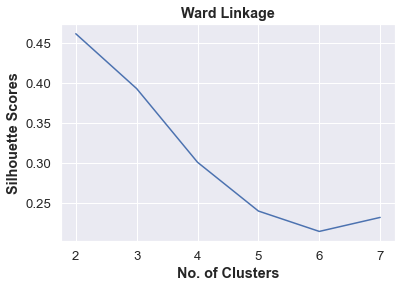

In [25]:
sns.set(font_scale=1.2)
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
plt.title('Ward Linkage',weight="bold")
plt.plot(range(2,8), s_s)
sns.set(font_scale=1)

[0.44118916968648897,
 0.3760282261979445,
 0.3526121671249803,
 0.30495333562445376,
 0.29324876770905217,
 0.28446600775208575]

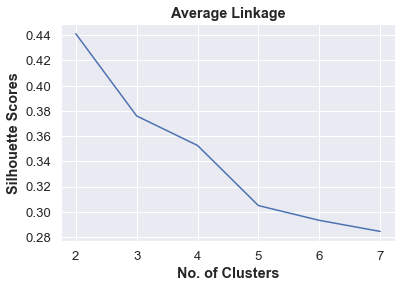

In [26]:
# average link
avglink = linkage(data_scaled, method = 'average')

s_s=[]
for i in range(2,8):
    clusters = fcluster(avglink, t=i, criterion='maxclust')
    s_s.append(silhouette_score(data_scaled,clusters))
display(s_s)

sns.set(font_scale=1.2)
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
plt.title('Average Linkage',weight="bold")
plt.plot(range(2,8), s_s)
sns.set(font_scale=1)

[0.46303458955269033,
 0.3372758529705197,
 0.3767425424949836,
 0.33049327815036583,
 0.2517679493025941,
 0.19599291370417574]

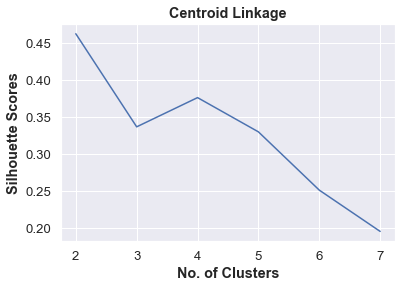

In [27]:
# centroid link
centroid = linkage(data_scaled, method = 'centroid')

s_s=[]
for i in range(2,8):
    clusters = fcluster(centroid, t=i, criterion='maxclust')
    s_s.append(silhouette_score(data_scaled,clusters))
display(s_s)

sns.set(font_scale=1.2)
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
plt.title('Centroid Linkage',weight="bold")
plt.plot(range(2,8), s_s)
sns.set(font_scale=1)

[0.05734334368197974,
 -0.012530952510587173,
 -0.05598386279058719,
 -0.21626419651953077,
 -0.22410577180736738,
 -0.27184477944884056]

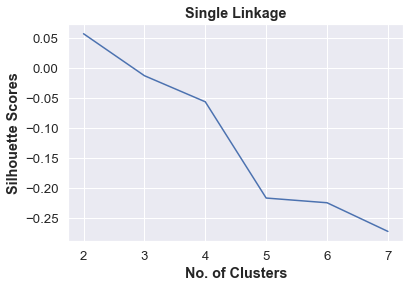

In [28]:
# single link
single = linkage(data_scaled, method = 'single')

s_s=[]
for i in range(2,8):
    clusters = fcluster(single, t=i, criterion='maxclust')
    s_s.append(silhouette_score(data_scaled,clusters))
display(s_s)

sns.set(font_scale=1.2)
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
plt.title('Single Linkage',weight="bold")
plt.plot(range(2,8), s_s)
sns.set(font_scale=1)

[-0.27184477944884056,
 -0.27184477944884056,
 -0.27184477944884056,
 -0.27184477944884056,
 -0.27184477944884056,
 -0.27184477944884056]

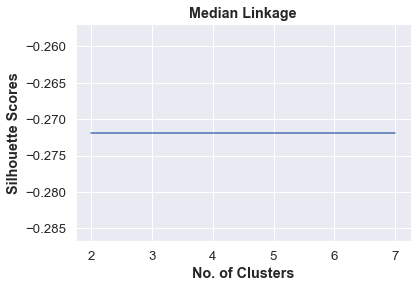

In [29]:
# median link
median = linkage(data_scaled, method = 'median')

s_s=[]
for i in range(2,8):
    clusters_median = fcluster(median, t=i, criterion='maxclust')
    s_s.append(silhouette_score(data_scaled,clusters))
display(s_s)

sns.set(font_scale=1.2)
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
plt.title('Median Linkage',weight="bold")
plt.plot(range(2,8), s_s)
sns.set(font_scale=1)

[0.4129534071404428,
 0.3081495231698347,
 0.28997411051124405,
 0.2648432352976623,
 0.25339833145139407,
 0.22934358962423637]

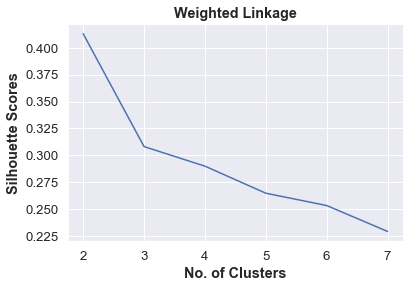

In [30]:
# weighted link
weighted = linkage(data_scaled, method = 'weighted')

s_s=[]
for i in range(2,8):
    clusters = fcluster(weighted, t=i, criterion='maxclust')
    s_s.append(silhouette_score(data_scaled,clusters))
display(s_s)

sns.set(font_scale=1.2)
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
plt.title('Weighted Linkage',weight="bold")
plt.plot(range(2,8), s_s)
sns.set(font_scale=1)

[0.39792406518072526,
 0.2855626733932902,
 0.20751908295247892,
 0.22767263345730068,
 0.21549013974638617,
 0.23682598116076337]

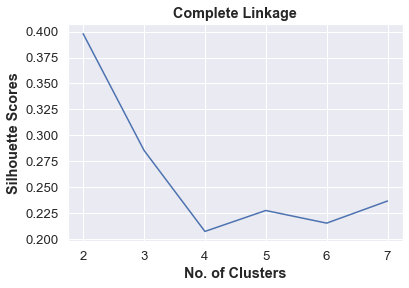

In [31]:
# complete link
complete = linkage(data_scaled, method = 'complete')

s_s=[]
for i in range(2,8):
    clusters = fcluster(complete, t=i, criterion='maxclust')
    s_s.append(silhouette_score(data_scaled,clusters))
display(s_s)

sns.set(font_scale=1.2)
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
plt.title('Complete Linkage',weight="bold")
plt.plot(range(2,8), s_s)
sns.set(font_scale=1)

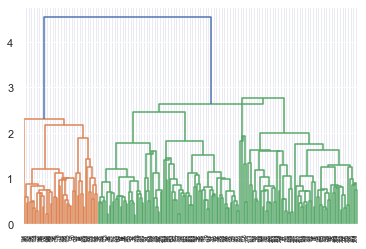

In [32]:
dend = dendrogram(median)

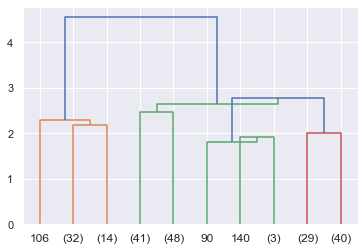

In [33]:
dend = dendrogram(median,
                 truncate_mode='lastp',    # 'lastp' in truncate will show till last 'p' merges
                 p = 10,color_threshold=2.7
                 )

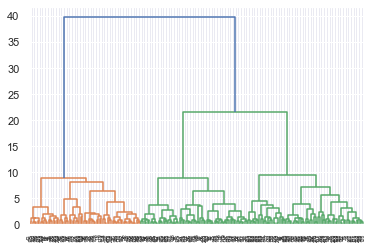

In [34]:
dend = dendrogram(wardlink)

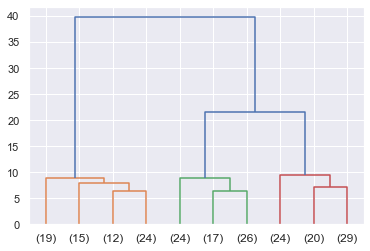

In [35]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',    # 'lastp' in truncate will show till last 'p' merges
                 p = 10,color_threshold=10
                 )

In [36]:
median = linkage(data_scaled, method = 'median')
clusters_median = fcluster(median, t=3, criterion='maxclust') # 'criterion' is applied on 't', here 3 clusters will be formed because of 'maxclust'
df['Median Clusters'] = clusters_median
df['Ward Clusters'] = clusters_ward
clusters_median  # there is no 3rd cluster in median linkaged clustering

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

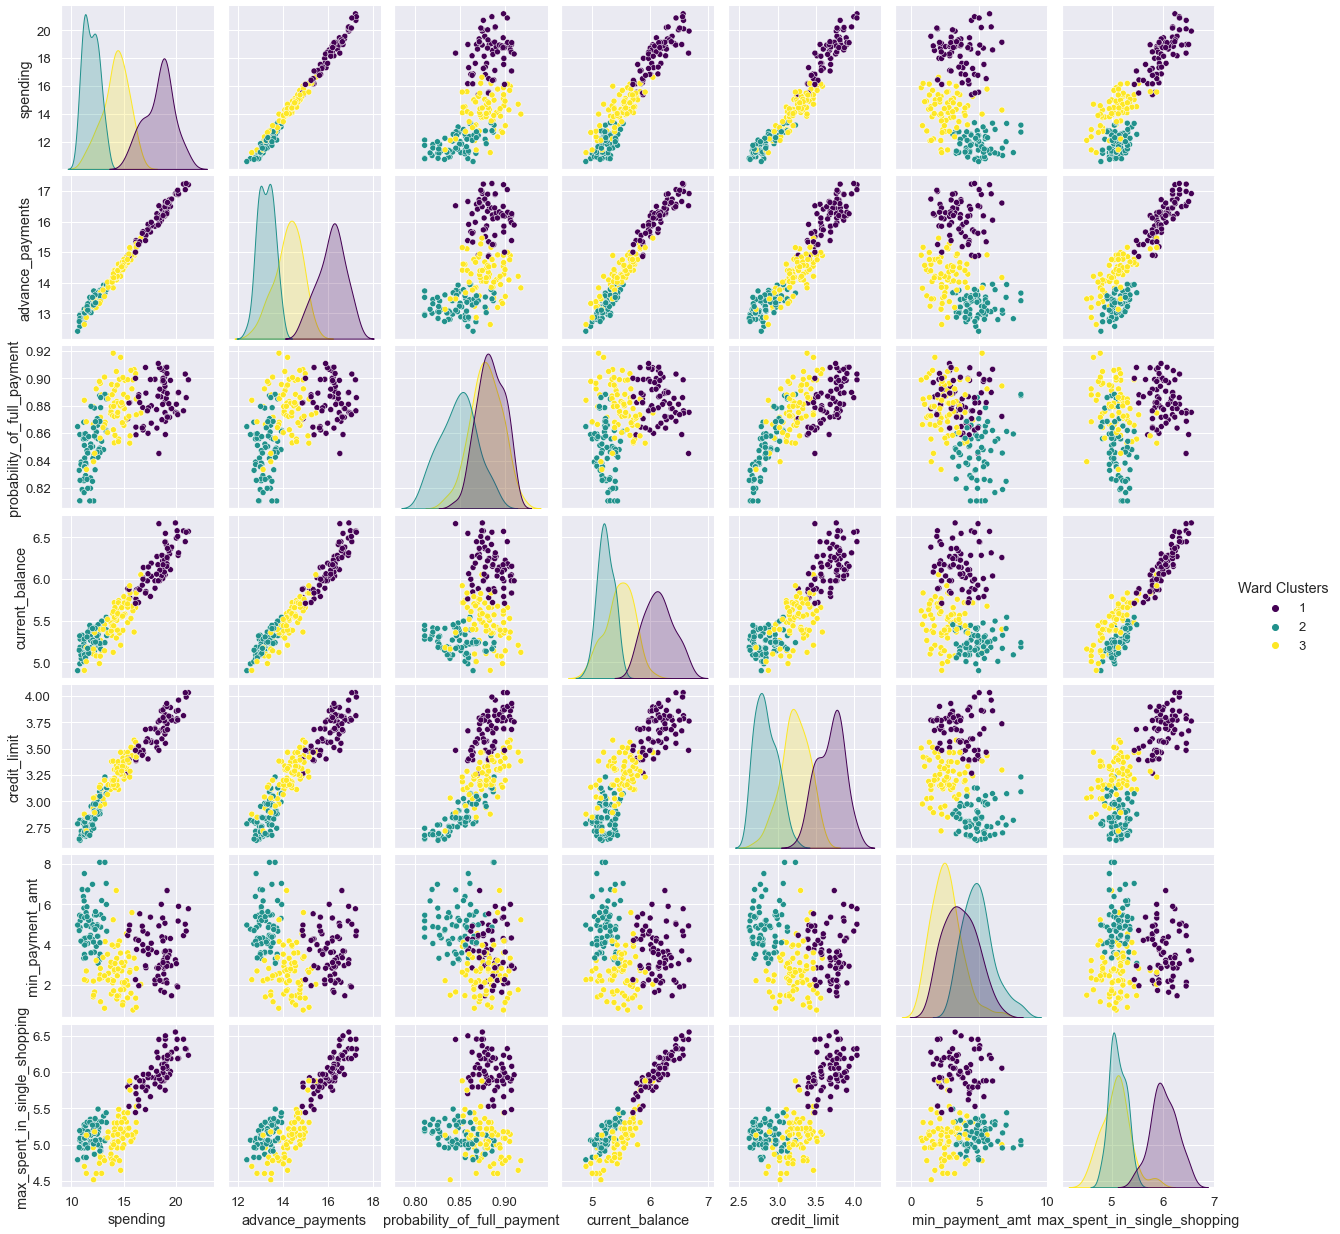

In [37]:
df.drop('Median Clusters',axis=1,inplace=True)
sns.set(font_scale=1.2)
sns.pairplot(df,hue='Ward Clusters',palette='viridis').savefig('out1.jpg');
sns.set(font_scale=1)

In [38]:
df[df['Ward Clusters']==1]

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                       0.8752            6.675   
2       18.95             16.42                       0.8829            6.248   
4       17.99             15.86                       0.8992            5.890   
8       18.17             16.26                       0.8637            6.271   
10      18.55             16.22                       0.8865            6.153   
..        ...               ...                          ...              ...   
198     19.18             16.63                       0.8717            6.369   
201     17.08             15.38                       0.9079            5.832   
204     16.41             15.25                       0.8866            5.718   
206     16.77             15.62                       0.8638            5.927   
208     16.12             15.00                       0.9000            5.709   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
0           3.763            3.252                         6.550   
2           3.755            3.368                         6.148   
4           3.694            2.068                         5.837   
8           3.512            2.853                         6.273   
10          3.674            1.738                         5.894   
..            ...              ...                           ...   
198         3.681            3.357                         6.229   
201         3.683            2.956                         5.484   
204         3.525            4.217                         5.618   
206         3.438            4.920                         5.795   
208         3.485            2.270                         5.443   

     Ward Clusters  
0                1  
2                1  
4                1  
8                1  
10               1  
..             ...  
198              1  
201              1  
204              1  
206              1  
208              1  

[70 rows x 8 columns]

In [39]:
df[df['Ward Clusters']==2]

spending  advance_payments  probability_of_full_payment  current_balance  \
3       10.83             12.96                     0.810588            5.278   
5       12.70             13.41                     0.887400            5.183   
6       12.02             13.33                     0.850300            5.350   
9       11.23             12.88                     0.851100            5.140   
12      12.15             13.45                     0.844300            5.417   
..        ...               ...                          ...              ...   
189     11.75             13.52                     0.810588            5.444   
192     12.26             13.60                     0.833300            5.408   
197     12.30             13.34                     0.868400            5.243   
199     12.01             13.52                     0.824900            5.405   
203     11.55             13.10                     0.845500            5.167   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
3           2.641         5.182000                         5.185   
5           3.091         8.079625                         5.000   
6           2.810         4.271000                         5.308   
9           2.795         4.325000                         5.003   
12          2.837         3.638000                         5.338   
..            ...              ...                           ...   
189         2.678         4.378000                         5.310   
192         2.833         4.756000                         5.360   
197         2.974         5.637000                         5.063   
199         2.776         6.992000                         5.270   
203         2.845         6.715000                         4.956   

     Ward Clusters  
3                2  
5                2  
6                2  
9                2  
12               2  
..             ...  
189              2  
192              2  
197              2  
199              2  
203              2  

[67 rows x 8 columns]

In [40]:
df[df['Ward Clusters']==3]

spending  advance_payments  probability_of_full_payment  current_balance  \
1       15.99             14.89                       0.9064            5.363   
7       13.74             14.05                       0.8744            5.482   
11      14.09             14.41                       0.8529            5.717   
14      12.10             13.15                       0.8793            5.105   
16      16.14             14.99                       0.9034            5.658   
..        ...               ...                          ...              ...   
200     14.88             14.57                       0.8811            5.554   
202     14.80             14.52                       0.8823            5.656   
205     13.89             14.02                       0.8880            5.439   
207     14.03             14.16                       0.8796            5.438   
209     15.57             15.15                       0.8527            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
1           3.582            3.336                         5.144   
7           3.114            2.932                         4.825   
11          3.186            3.920                         5.299   
14          2.941            2.201                         5.056   
16          3.562            1.355                         5.175   
..            ...              ...                           ...   
200         3.333            1.018                         4.956   
202         3.288            3.112                         5.309   
205         3.199            3.986                         4.738   
207         3.201            1.717                         5.001   
209         3.231            2.640                         5.879   

     Ward Clusters  
1                3  
7                3  
11               3  
14               3  
16               3  
..             ...  
200              3  
202              3  
205              3  
207              3  
209              3  

[73 rows x 8 columns]

In [41]:
df1=df[df['Ward Clusters']==1].describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      18.37  1.38  15.38  17.33   18.72  19.14  21.18   
advance_payments              16.15  0.60  14.86  15.74   16.21  16.56  17.25   
probability_of_full_payment    0.88  0.01   0.85   0.87    0.88   0.90   0.91   
current_balance                6.16  0.25   5.71   5.98    6.15   6.31   6.68   
credit_limit                   3.68  0.17   3.27   3.55    3.69   3.80   4.03   
min_payment_amt                3.64  1.21   1.47   2.85    3.63   4.46   6.68   
max_spent_in_single_shopping   6.02  0.25   5.44   5.88    5.98   6.19   6.55   
Ward Clusters                  1.00  0.00   1.00   1.00    1.00   1.00   1.00   

                              range   IQR    CV  mode1  mode2  mode3  
spending                       5.80  1.81  0.08  11.23  14.11  15.38  
advance_payments               2.39  0.82  0.04  13.47    NaN    NaN  
probability_of_full_payment    0.07  0.02  0.02   0.81   0.88    NaN  
current_balance                0.97  0.33  0.04   5.24   5.40    NaN  
credit_limit                   0.77  0.25  0.05   3.03    NaN    NaN  
min_payment_amt                5.21  1.61  0.33   2.13   2.22   2.70  
max_spent_in_single_shopping   1.11  0.31  0.04   5.00    NaN    NaN  
Ward Clusters                  0.00  0.00  0.00   3.00    NaN    NaN

In [42]:
df1=df[df['Ward Clusters']==2].describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      11.87  0.74  10.59  11.25   11.83  12.45  13.37   
advance_payments              13.26  0.35  12.41  13.00   13.27  13.52  13.95   
probability_of_full_payment    0.85  0.02   0.81   0.83    0.85   0.86   0.89   
current_balance                5.24  0.14   4.90   5.14    5.24   5.33   5.54   
credit_limit                   2.85  0.14   2.63   2.73    2.83   2.97   3.23   
min_payment_amt                4.94  1.14   3.08   4.12    4.86   5.47   8.08   
max_spent_in_single_shopping   5.12  0.16   4.79   5.00    5.09   5.25   5.49   
Ward Clusters                  2.00  0.00   2.00   2.00    2.00   2.00   2.00   

                              range   IQR    CV  mode1  mode2  mode3  
spending                       2.78  1.20  0.06  11.23  14.11  15.38  
advance_payments               1.54  0.52  0.03  13.47    NaN    NaN  
probability_of_full_payment    0.08  0.03  0.02   0.81   0.88    NaN  
current_balance                0.64  0.19  0.03   5.24   5.40    NaN  
credit_limit                   0.60  0.24  0.05   3.03    NaN    NaN  
min_payment_amt                5.00  1.35  0.23   2.13   2.22   2.70  
max_spent_in_single_shopping   0.70  0.25  0.03   5.00    NaN    NaN  
Ward Clusters                  0.00  0.00  0.00   3.00    NaN    NaN

In [43]:
df1=df[df['Ward Clusters']==3].describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      14.20  1.23  11.23  13.50   14.33  15.03  16.63   
advance_payments              14.23  0.60  12.63  13.85   14.28  14.67  15.46   
probability_of_full_payment    0.88  0.02   0.83   0.87    0.88   0.89   0.92   
current_balance                5.48  0.24   4.90   5.35    5.50   5.66   6.05   
credit_limit                   3.23  0.18   2.72   3.13    3.22   3.37   3.58   
min_payment_amt                2.61  1.12   0.77   1.79    2.50   3.14   6.68   
max_spent_in_single_shopping   5.09  0.28   4.52   4.87    5.10   5.22   5.88   
Ward Clusters                  3.00  0.00   3.00   3.00    3.00   3.00   3.00   

                              range   IQR    CV  mode1  mode2  mode3  
spending                       5.40  1.53  0.09  11.23  14.11  15.38  
advance_payments               2.83  0.82  0.04  13.47    NaN    NaN  
probability_of_full_payment    0.08  0.02  0.02   0.81   0.88    NaN  
current_balance                1.15  0.31  0.04   5.24   5.40    NaN  
credit_limit                   0.86  0.24  0.06   3.03    NaN    NaN  
min_payment_amt                5.92  1.35  0.43   2.13   2.22   2.70  
max_spent_in_single_shopping   1.36  0.35  0.05   5.00    NaN    NaN  
Ward Clusters                  0.00  0.00  0.00   3.00    NaN    NaN

In [44]:
round(pd.pivot_table(df,index='Ward Clusters',aggfunc=np.mean),2)

advance_payments  credit_limit  current_balance  \
Ward Clusters                                                    
1                         16.15          3.68             6.16   
2                         13.26          2.85             5.24   
3                         14.23          3.23             5.48   

               max_spent_in_single_shopping  min_payment_amt  \
Ward Clusters                                                  
1                                      6.02             3.64   
2                                      5.12             4.94   
3                                      5.09             2.61   

               probability_of_full_payment  spending  
Ward Clusters                                         
1                                     0.88     18.37  
2                                     0.85     11.87  
3                                     0.88     14.20

In [45]:
#df=pd.read_csv('bank_marketing_part1_Data-1.csv') 

In [46]:
from sklearn.cluster import KMeans

In [47]:
k_means = KMeans(n_clusters = 2)

In [48]:
k_means.fit(data_scaled)

KMeans(n_clusters=2)

In [49]:
k_means.labels_ #'.labels_' tells which observation(all 210) belongs to which cluster

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [50]:
len(k_means.labels_)

210

In [51]:
wss=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_scaled)
    wss.append(KM.inertia_)
wss

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 370.8036260123531,
 326.88464076818576,
 289.4533039619778,
 261.88436104625646,
 239.71327875363684,
 222.0591878552685,
 207.29859780344003]

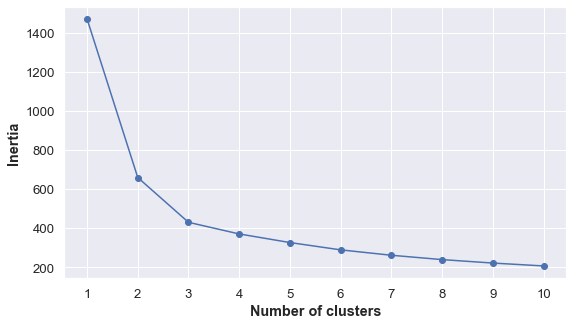

In [52]:
sns.set(font_scale=1.2)
plt.figure(figsize=(9,5))
plt.xlabel('Number of clusters',weight='bold')
plt.ylabel('Inertia',weight='bold')
plt.xticks(range(1,11))
plt.plot(range(1,11), wss,marker='o')
sns.set(font_scale=1)

[0.46560100442748986,
 0.4008059221522216,
 0.33017886400486984,
 0.28507231871329614,
 0.2743342176580492,
 0.24855602325982068,
 0.249380624931419,
 0.26669396804353634,
 0.26018662411091625]

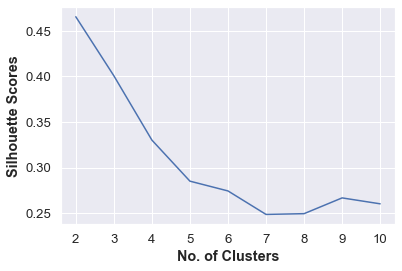

In [53]:
s_s=[]
for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_scaled)
    s_s.append(silhouette_score(data_scaled,KM.labels_))
display(s_s)

sns.set(font_scale=1.2)
plt.xticks(range(2,11))
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
#plt.title('Silhouette Scores for different clusters',weight="bold")
plt.plot(range(2,11), s_s)
sns.set(font_scale=1)

In [54]:
k_means = KMeans(n_clusters = 3,random_state=0)
k_means.fit(data_scaled)
k_means.labels_

array([2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2,
       0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2,
       2, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1,
       2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2,
       1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1,
       1, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2,
       1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1])

In [55]:
df['Kmeans Clusters'] = k_means.labels_
df

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                     0.875200            6.675   
1       15.99             14.89                     0.906400            5.363   
2       18.95             16.42                     0.882900            6.248   
3       10.83             12.96                     0.810588            5.278   
4       17.99             15.86                     0.899200            5.890   
..        ...               ...                          ...              ...   
205     13.89             14.02                     0.888000            5.439   
206     16.77             15.62                     0.863800            5.927   
207     14.03             14.16                     0.879600            5.438   
208     16.12             15.00                     0.900000            5.709   
209     15.57             15.15                     0.852700            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
0           3.763            3.252                         6.550   
1           3.582            3.336                         5.144   
2           3.755            3.368                         6.148   
3           2.641            5.182                         5.185   
4           3.694            2.068                         5.837   
..            ...              ...                           ...   
205         3.199            3.986                         4.738   
206         3.438            4.920                         5.795   
207         3.201            1.717                         5.001   
208         3.485            2.270                         5.443   
209         3.231            2.640                         5.879   

     Ward Clusters  Kmeans Clusters  
0                1                2  
1                3                1  
2                1                2  
3                2                0  
4                1                2  
..             ...              ...  
205              3                1  
206              1                2  
207              3                1  
208              1                1  
209              3                1  

[210 rows x 9 columns]

In [56]:
silhouette_score(data_scaled,k_means.labels_)

0.4008059221522216

In [57]:
from sklearn.metrics import silhouette_samples
sil_width = silhouette_samples(data_scaled,k_means.labels_)
df["sil_width"] = sil_width
df

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                     0.875200            6.675   
1       15.99             14.89                     0.906400            5.363   
2       18.95             16.42                     0.882900            6.248   
3       10.83             12.96                     0.810588            5.278   
4       17.99             15.86                     0.899200            5.890   
..        ...               ...                          ...              ...   
205     13.89             14.02                     0.888000            5.439   
206     16.77             15.62                     0.863800            5.927   
207     14.03             14.16                     0.879600            5.438   
208     16.12             15.00                     0.900000            5.709   
209     15.57             15.15                     0.852700            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
0           3.763            3.252                         6.550   
1           3.582            3.336                         5.144   
2           3.755            3.368                         6.148   
3           2.641            5.182                         5.185   
4           3.694            2.068                         5.837   
..            ...              ...                           ...   
205         3.199            3.986                         4.738   
206         3.438            4.920                         5.795   
207         3.201            1.717                         5.001   
208         3.485            2.270                         5.443   
209         3.231            2.640                         5.879   

     Ward Clusters  Kmeans Clusters  sil_width  
0                1                2   0.573278  
1                3                1   0.365564  
2                1                2   0.637092  
3                2                0   0.515595  
4                1                2   0.360972  
..             ...              ...        ...  
205              3                1   0.308036  
206              1                2   0.267423  
207              3                1   0.505922  
208              1                1   0.257174  
209              3                1   0.042063  

[210 rows x 10 columns]

In [58]:
silhouette_samples(data_scaled,k_means.labels_).min()

0.0027685411286160638

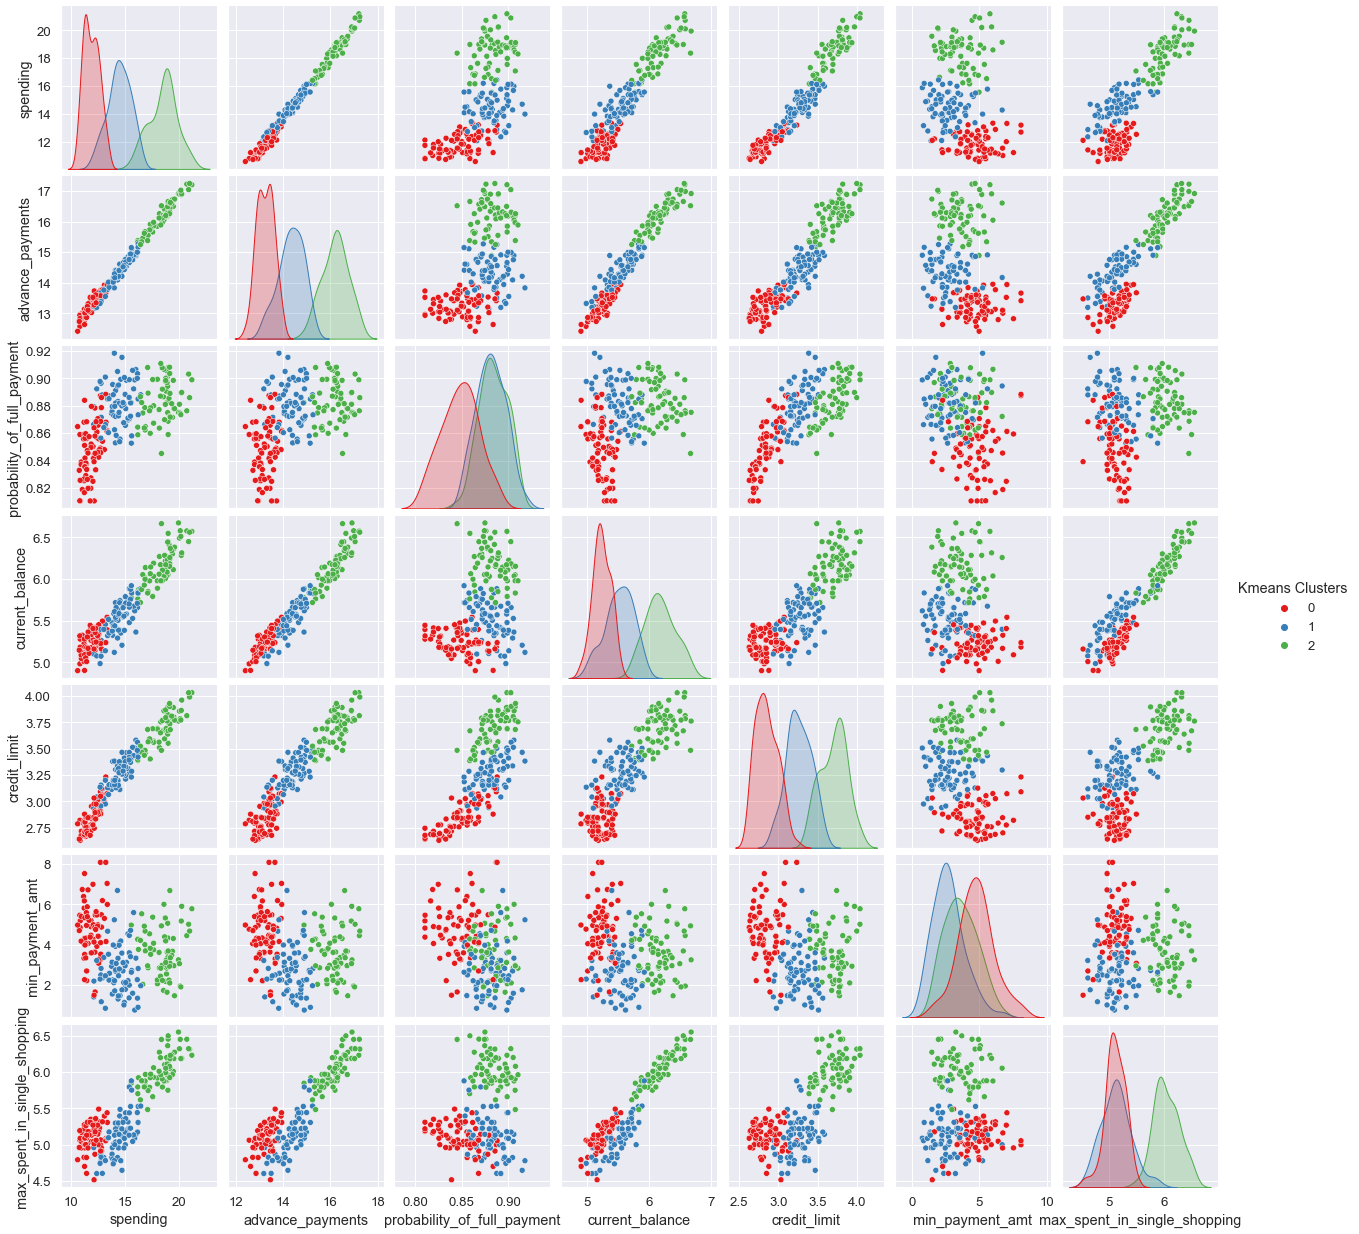

In [59]:
sns.set(font_scale=1.2)
sns.pairplot(df.drop(['Ward Clusters','sil_width'],axis=1),hue='Kmeans Clusters',palette="Set1").savefig('out2.jpg');
sns.set(font_scale=1)

In [60]:
df[df['Kmeans Clusters']==0]

spending  advance_payments  probability_of_full_payment  current_balance  \
3       10.83             12.96                     0.810588            5.278   
5       12.70             13.41                     0.887400            5.183   
6       12.02             13.33                     0.850300            5.350   
9       11.23             12.88                     0.851100            5.140   
12      12.15             13.45                     0.844300            5.417   
..        ...               ...                          ...              ...   
190     11.23             12.63                     0.884000            4.902   
192     12.26             13.60                     0.833300            5.408   
197     12.30             13.34                     0.868400            5.243   
199     12.01             13.52                     0.824900            5.405   
203     11.55             13.10                     0.845500            5.167   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
3           2.641         5.182000                         5.185   
5           3.091         8.079625                         5.000   
6           2.810         4.271000                         5.308   
9           2.795         4.325000                         5.003   
12          2.837         3.638000                         5.338   
..            ...              ...                           ...   
190         2.879         2.269000                         4.703   
192         2.833         4.756000                         5.360   
197         2.974         5.637000                         5.063   
199         2.776         6.992000                         5.270   
203         2.845         6.715000                         4.956   

     Ward Clusters  Kmeans Clusters  sil_width  
3                2                0   0.515595  
5                2                0   0.221525  
6                2                0   0.475295  
9                2                0   0.534439  
12               2                0   0.391778  
..             ...              ...        ...  
190              3                0   0.002769  
192              2                0   0.497434  
197              2                0   0.398505  
199              2                0   0.472906  
203              2                0   0.511653  

[72 rows x 10 columns]

In [61]:
df[df['Kmeans Clusters']==1]

spending  advance_payments  probability_of_full_payment  current_balance  \
1       15.99             14.89                       0.9064            5.363   
7       13.74             14.05                       0.8744            5.482   
11      14.09             14.41                       0.8529            5.717   
14      12.10             13.15                       0.8793            5.105   
16      16.14             14.99                       0.9034            5.658   
..        ...               ...                          ...              ...   
202     14.80             14.52                       0.8823            5.656   
205     13.89             14.02                       0.8880            5.439   
207     14.03             14.16                       0.8796            5.438   
208     16.12             15.00                       0.9000            5.709   
209     15.57             15.15                       0.8527            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
1           3.582            3.336                         5.144   
7           3.114            2.932                         4.825   
11          3.186            3.920                         5.299   
14          2.941            2.201                         5.056   
16          3.562            1.355                         5.175   
..            ...              ...                           ...   
202         3.288            3.112                         5.309   
205         3.199            3.986                         4.738   
207         3.201            1.717                         5.001   
208         3.485            2.270                         5.443   
209         3.231            2.640                         5.879   

     Ward Clusters  Kmeans Clusters  sil_width  
1                3                1   0.365564  
7                3                1   0.360258  
11               3                1   0.128399  
14               3                1   0.112021  
16               3                1   0.337610  
..             ...              ...        ...  
202              3                1   0.517202  
205              3                1   0.308036  
207              3                1   0.505922  
208              1                1   0.257174  
209              3                1   0.042063  

[71 rows x 10 columns]

In [62]:
df[df['Kmeans Clusters']==2]

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                       0.8752            6.675   
2       18.95             16.42                       0.8829            6.248   
4       17.99             15.86                       0.8992            5.890   
8       18.17             16.26                       0.8637            6.271   
10      18.55             16.22                       0.8865            6.153   
..        ...               ...                          ...              ...   
196     18.76             16.20                       0.8984            6.172   
198     19.18             16.63                       0.8717            6.369   
201     17.08             15.38                       0.9079            5.832   
204     16.41             15.25                       0.8866            5.718   
206     16.77             15.62                       0.8638            5.927   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
0           3.763            3.252                         6.550   
2           3.755            3.368                         6.148   
4           3.694            2.068                         5.837   
8           3.512            2.853                         6.273   
10          3.674            1.738                         5.894   
..            ...              ...                           ...   
196         3.796            3.120                         6.053   
198         3.681            3.357                         6.229   
201         3.683            2.956                         5.484   
204         3.525            4.217                         5.618   
206         3.438            4.920                         5.795   

     Ward Clusters  Kmeans Clusters  sil_width  
0                1                2   0.573278  
2                1                2   0.637092  
4                1                2   0.360972  
8                1                2   0.519383  
10               1                2   0.465994  
..             ...              ...        ...  
196              1                2   0.597003  
198              1                2   0.613304  
201              1                2   0.096727  
204              1                2   0.047354  
206              1                2   0.267423  

[67 rows x 10 columns]

In [63]:
df1=df[df['Kmeans Clusters']==0].drop('Ward Clusters',axis=1).describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      11.86  0.71  10.59  11.26   11.82  12.40  13.34   
advance_payments              13.25  0.36  12.41  12.99   13.25  13.48  13.95   
probability_of_full_payment    0.85  0.02   0.81   0.84    0.85   0.86   0.89   
current_balance                5.23  0.14   4.90   5.14    5.22   5.34   5.54   
credit_limit                   2.85  0.14   2.63   2.74    2.84   2.97   3.23   
min_payment_amt                4.73  1.33   1.50   4.03    4.80   5.46   8.08   
max_spent_in_single_shopping   5.10  0.18   4.52   5.00    5.09   5.22   5.49   
Kmeans Clusters                0.00  0.00   0.00   0.00    0.00   0.00   0.00   
sil_width                      0.40  0.16   0.00   0.32    0.46   0.52   0.59   

                              range   IQR    CV  mode1  mode2  mode3  
spending                       2.75  1.14  0.06  11.23  14.11  15.38  
advance_payments               1.54  0.49  0.03  13.47    NaN    NaN  
probability_of_full_payment    0.08  0.03  0.02   0.81   0.88    NaN  
current_balance                0.64  0.20  0.03   5.24   5.40    NaN  
credit_limit                   0.60  0.23  0.05   3.03    NaN    NaN  
min_payment_amt                6.58  1.43  0.28   2.13   2.22   2.70  
max_spent_in_single_shopping   0.97  0.22  0.04   5.00    NaN    NaN  
Kmeans Clusters                0.00  0.00   NaN   0.00    NaN    NaN  
sil_width                      0.59  0.20  0.40   0.00   0.00   0.01

In [64]:
df1=df[df['Kmeans Clusters']==1].drop('Ward Clusters',axis=1).describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      14.44  1.06  12.08  13.82   14.43  15.26  16.44   
advance_payments              14.34  0.53  13.15  14.03   14.39  14.76  15.27   
probability_of_full_payment    0.88  0.02   0.85   0.87    0.88   0.89   0.92   
current_balance                5.51  0.23   4.98   5.38    5.54   5.69   5.92   
credit_limit                   3.26  0.15   2.94   3.16    3.26   3.38   3.58   
min_payment_amt                2.71  1.18   0.77   1.95    2.64   3.33   6.68   
max_spent_in_single_shopping   5.12  0.27   4.61   4.96    5.13   5.26   5.88   
Kmeans Clusters                1.00  0.00   1.00   1.00    1.00   1.00   1.00   
sil_width                      0.34  0.17   0.00   0.23    0.37   0.48   0.55   

                              range   IQR    CV  mode1  mode2  mode3  
spending                       4.36  1.44  0.07  11.23  14.11  15.38  
advance_payments               2.12  0.73  0.04  13.47    NaN    NaN  
probability_of_full_payment    0.07  0.02  0.02   0.81   0.88    NaN  
current_balance                0.94  0.31  0.04   5.24   5.40    NaN  
credit_limit                   0.65  0.22  0.05   3.03    NaN    NaN  
min_payment_amt                5.92  1.38  0.43   2.13   2.22   2.70  
max_spent_in_single_shopping   1.27  0.30  0.05   5.00    NaN    NaN  
Kmeans Clusters                0.00  0.00  0.00   0.00    NaN    NaN  
sil_width                      0.55  0.25  0.49   0.00   0.00   0.01

In [65]:
df1=df[df['Kmeans Clusters']==2].drop('Ward Clusters',axis=1).describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      18.50  1.28  15.56  17.59   18.75  19.14  21.18   
advance_payments              16.20  0.55  14.89  15.86   16.23  16.58  17.25   
probability_of_full_payment    0.88  0.01   0.85   0.87    0.88   0.90   0.91   
current_balance                6.18  0.24   5.72   6.01    6.15   6.33   6.68   
credit_limit                   3.70  0.17   3.39   3.56    3.72   3.81   4.03   
min_payment_amt                3.63  1.21   1.47   2.85    3.62   4.42   6.68   
max_spent_in_single_shopping   6.04  0.23   5.48   5.88    6.01   6.19   6.55   
Kmeans Clusters                2.00  0.00   2.00   2.00    2.00   2.00   2.00   
sil_width                      0.47  0.15   0.03   0.42    0.52   0.57   0.64   

                              range   IQR    CV  mode1  mode2  mode3  
spending                       5.62  1.55  0.07  11.23  14.11  15.38  
advance_payments               2.36  0.72  0.03  13.47    NaN    NaN  
probability_of_full_payment    0.07  0.02  0.02   0.81   0.88    NaN  
current_balance                0.96  0.32  0.04   5.24   5.40    NaN  
credit_limit                   0.65  0.24  0.04   3.03    NaN    NaN  
min_payment_amt                5.21  1.57  0.33   2.13   2.22   2.70  
max_spent_in_single_shopping   1.07  0.31  0.04   5.00    NaN    NaN  
Kmeans Clusters                0.00  0.00  0.00   0.00    NaN    NaN  
sil_width                      0.61  0.15  0.33   0.00   0.00   0.01

In [66]:
round(pd.pivot_table(df.drop(['Ward Clusters','sil_width'],axis=1),index='Kmeans Clusters',aggfunc=np.mean),2)

advance_payments  credit_limit  current_balance  \
Kmeans Clusters                                                    
0                           13.25          2.85             5.23   
1                           14.34          3.26             5.51   
2                           16.20          3.70             6.18   

                 max_spent_in_single_shopping  min_payment_amt  \
Kmeans Clusters                                                  
0                                        5.10             4.73   
1                                        5.12             2.71   
2                                        6.04             3.63   

                 probability_of_full_payment  spending  
Kmeans Clusters                                         
0                                       0.85     11.86  
1                                       0.88     14.44  
2                                       0.88     18.50

In [67]:
pd.DataFrame(k_means.cluster_centers_,columns=df.drop(['Ward Clusters','sil_width','Kmeans Clusters'],axis=1).columns)

spending  advance_payments  probability_of_full_payment  current_balance  \
0 -1.030253         -1.006649                    -0.965588        -0.897685   
1 -0.141119         -0.170043                     0.449804        -0.257814   
2  1.256682          1.261966                     0.560989         1.237883   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0     -1.085583         0.695182                     -0.624809  
1      0.001647        -0.663892                     -0.585893  
2      1.164852        -0.043534                      1.292308

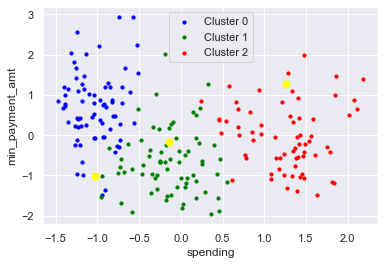

In [103]:
data_scaled['Kmeans Clusters'] = k_means.labels_
cluster0=data_scaled[data_scaled['Kmeans Clusters']==0]
cluster1=data_scaled[data_scaled['Kmeans Clusters']==1]
cluster2=data_scaled[data_scaled['Kmeans Clusters']==2]

plt.scatter(cluster0['spending'], cluster0['min_payment_amt'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['spending'], cluster1['min_payment_amt'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['spending'], cluster2['min_payment_amt'], s=10, c='red', label ='Cluster 2')
plt.xlabel('spending')
plt.ylabel('min_payment_amt')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()



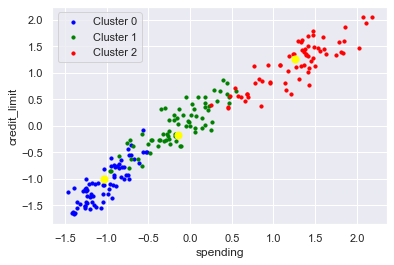

In [107]:
plt.scatter(cluster0['spending'], cluster0['credit_limit'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['spending'], cluster1['credit_limit'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['spending'], cluster2['credit_limit'], s=10, c='red', label ='Cluster 2')
plt.xlabel('spending')
plt.ylabel('credit_limit')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

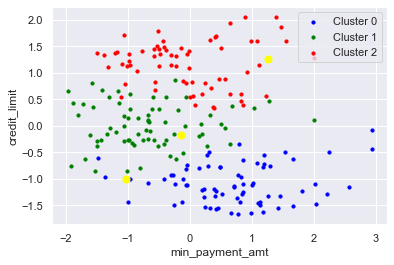

In [108]:
plt.scatter(cluster0['min_payment_amt'], cluster0['credit_limit'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['min_payment_amt'], cluster1['credit_limit'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['min_payment_amt'], cluster2['credit_limit'], s=10, c='red', label ='Cluster 2')
plt.xlabel('min_payment_amt')
plt.ylabel('credit_limit')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

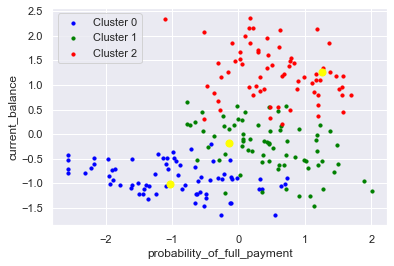

In [104]:
plt.scatter(cluster0['probability_of_full_payment'], cluster0['current_balance'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['probability_of_full_payment'], cluster1['current_balance'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['probability_of_full_payment'], cluster2['current_balance'], s=10, c='red', label ='Cluster 2')
plt.xlabel('probability_of_full_payment')
plt.ylabel('current_balance')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

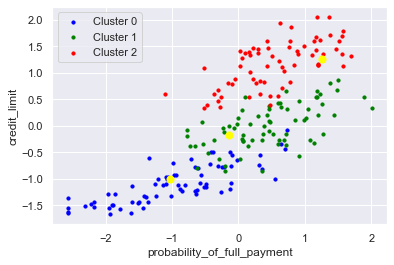

In [105]:
plt.scatter(cluster0['probability_of_full_payment'], cluster0['credit_limit'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['probability_of_full_payment'], cluster1['credit_limit'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['probability_of_full_payment'], cluster2['credit_limit'], s=10, c='red', label ='Cluster 2')
plt.xlabel('probability_of_full_payment')
plt.ylabel('credit_limit')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

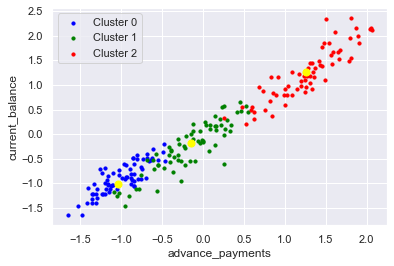

In [106]:
plt.scatter(cluster0['advance_payments'], cluster0['current_balance'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['advance_payments'], cluster1['current_balance'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['advance_payments'], cluster2['current_balance'], s=10, c='red', label ='Cluster 2')
plt.xlabel('advance_payments')
plt.ylabel('current_balance')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

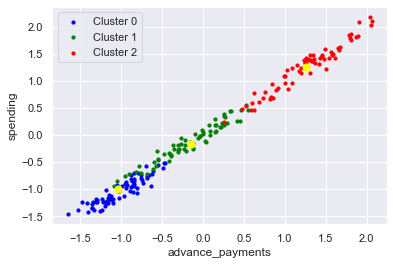

In [96]:
plt.scatter(cluster0['advance_payments'], cluster0['spending'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['advance_payments'], cluster1['spending'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['advance_payments'], cluster2['spending'], s=10, c='red', label ='Cluster 2')
plt.xlabel('advance_payments')
plt.ylabel('spending')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

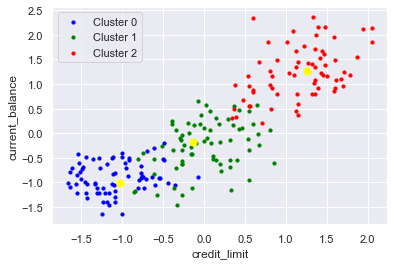

In [98]:
plt.scatter(cluster0['credit_limit'], cluster0['current_balance'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['credit_limit'], cluster1['current_balance'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['credit_limit'], cluster2['current_balance'], s=10, c='red', label ='Cluster 2')
plt.xlabel('credit_limit')
plt.ylabel('current_balance')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

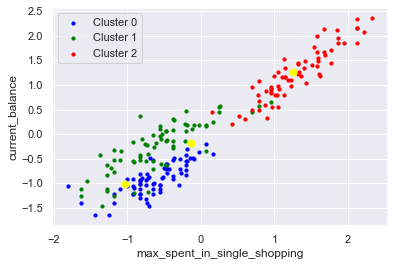

In [101]:
plt.scatter(cluster0['max_spent_in_single_shopping'], cluster0['current_balance'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['max_spent_in_single_shopping'], cluster1['current_balance'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['max_spent_in_single_shopping'], cluster2['current_balance'], s=10, c='red', label ='Cluster 2')
plt.xlabel('max_spent_in_single_shopping')
plt.ylabel('current_balance')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

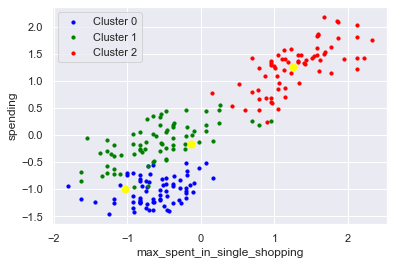

In [102]:
plt.scatter(cluster0['max_spent_in_single_shopping'], cluster0['spending'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['max_spent_in_single_shopping'], cluster1['spending'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['max_spent_in_single_shopping'], cluster2['spending'], s=10, c='red', label ='Cluster 2')
plt.xlabel('max_spent_in_single_shopping')
plt.ylabel('spending')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

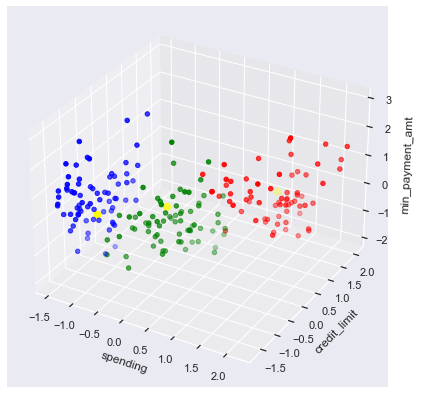

In [109]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['spending'], cluster0['credit_limit'], cluster0['min_payment_amt'],color='blue')
ax.scatter3D(cluster1['spending'], cluster1['credit_limit'], cluster1['min_payment_amt'],color='green')
ax.scatter3D(cluster2['spending'], cluster2['credit_limit'], cluster2['min_payment_amt'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('spending')
ax.set_ylabel('credit_limit')
ax.set_zlabel('min_payment_amt')

# show plot
plt.show()

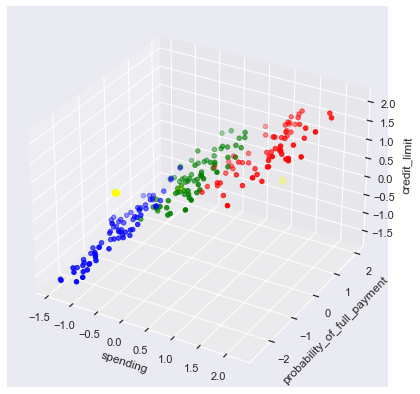

In [111]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['spending'], cluster0['probability_of_full_payment'], cluster0['credit_limit'],color='blue')
ax.scatter3D(cluster1['spending'], cluster1['probability_of_full_payment'], cluster1['credit_limit'],color='green')
ax.scatter3D(cluster2['spending'], cluster2['probability_of_full_payment'], cluster2['credit_limit'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('spending')
ax.set_ylabel('probability_of_full_payment')
ax.set_zlabel('credit_limit')

# show plot
plt.show()

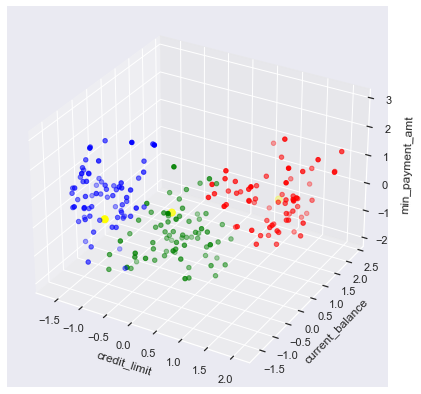

In [114]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['credit_limit'], cluster0['current_balance'], cluster0['min_payment_amt'],color='blue')
ax.scatter3D(cluster1['credit_limit'], cluster1['current_balance'], cluster1['min_payment_amt'],color='green')
ax.scatter3D(cluster2['credit_limit'], cluster2['current_balance'], cluster2['min_payment_amt'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('credit_limit')
ax.set_ylabel('current_balance')
ax.set_zlabel('min_payment_amt')

# show plot
plt.show()

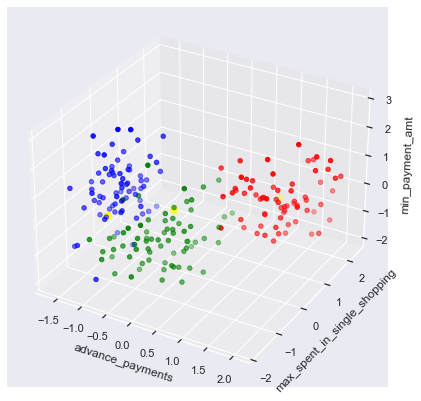

In [113]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['advance_payments'], cluster0['max_spent_in_single_shopping'], cluster0['min_payment_amt'],color='blue')
ax.scatter3D(cluster1['advance_payments'], cluster1['max_spent_in_single_shopping'], cluster1['min_payment_amt'],color='green')
ax.scatter3D(cluster2['advance_payments'], cluster2['max_spent_in_single_shopping'], cluster2['min_payment_amt'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('advance_payments')
ax.set_ylabel('max_spent_in_single_shopping')
ax.set_zlabel('min_payment_amt')

# show plot
plt.show()

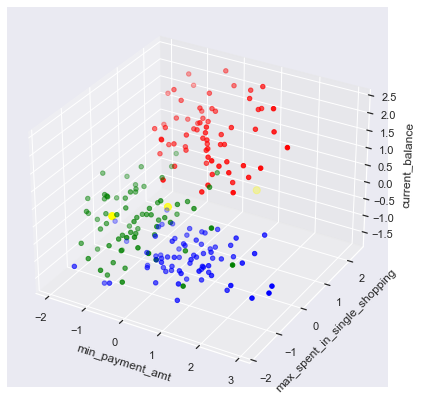

In [115]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['min_payment_amt'], cluster0['max_spent_in_single_shopping'], cluster0['current_balance'],color='blue')
ax.scatter3D(cluster1['min_payment_amt'], cluster1['max_spent_in_single_shopping'], cluster1['current_balance'],color='green')
ax.scatter3D(cluster2['min_payment_amt'], cluster2['max_spent_in_single_shopping'], cluster2['current_balance'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('min_payment_amt')
ax.set_ylabel('max_spent_in_single_shopping')
ax.set_zlabel('current_balance')

# show plot
plt.show()

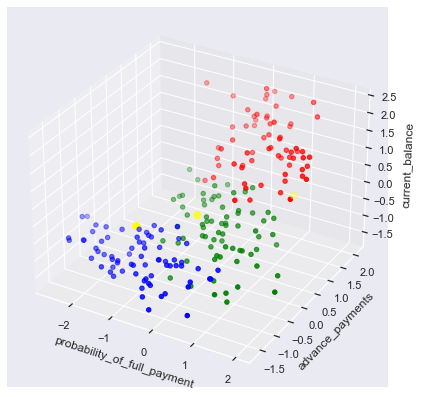

In [116]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['probability_of_full_payment'], cluster0['advance_payments'], cluster0['current_balance'],color='blue')
ax.scatter3D(cluster1['probability_of_full_payment'], cluster1['advance_payments'], cluster1['current_balance'],color='green')
ax.scatter3D(cluster2['probability_of_full_payment'], cluster2['advance_payments'], cluster2['current_balance'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('probability_of_full_payment')
ax.set_ylabel('advance_payments')
ax.set_zlabel('current_balance')

# show plot
plt.show()

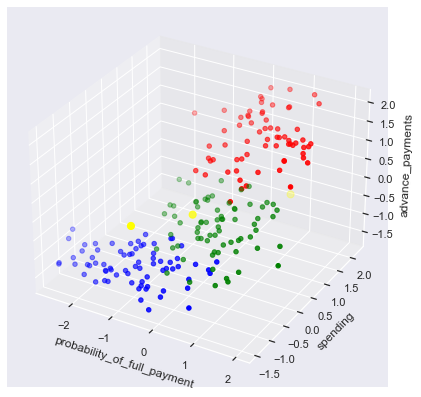

In [118]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['probability_of_full_payment'], cluster0['spending'], cluster0['advance_payments'],color='blue')
ax.scatter3D(cluster1['probability_of_full_payment'], cluster1['spending'], cluster1['advance_payments'],color='green')
ax.scatter3D(cluster2['probability_of_full_payment'], cluster2['spending'], cluster2['advance_payments'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('probability_of_full_payment')
ax.set_ylabel('spending')
ax.set_zlabel('advance_payments')

# show plot
plt.show()

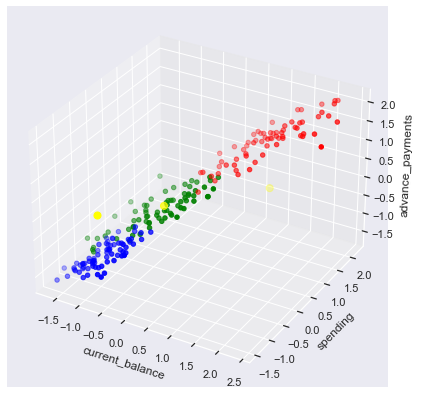

In [120]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['current_balance'], cluster0['spending'], cluster0['advance_payments'],color='blue')
ax.scatter3D(cluster1['current_balance'], cluster1['spending'], cluster1['advance_payments'],color='green')
ax.scatter3D(cluster2['current_balance'], cluster2['spending'], cluster2['advance_payments'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('current_balance')
ax.set_ylabel('spending')
ax.set_zlabel('advance_payments')

# show plot
plt.show()